In [153]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = 'notebook', #mostly controls relative sizes of things on plot 
                        #The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”
        style = 'darkgrid', #dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        palette = 'deep', # Should be something that color_palette() can process.
        font_scale = 1, 
        color_codes = False, 
        rc = None)

#from IPython.core.interactiveshell import InteractiveShell 
#InteractiveShell.ast_node_interactivity = 'last_expr' 
#setting = "all" allows multiple outputs to be displayed for a given input cell. don't use w plotting!

from IPython.display import display

import ast

%matplotlib notebook
#%matplotlib inline

pd.__version__ , np.__version__ #,  matplotlib.__version__, sns.__version__

('0.23.3', '1.14.2')

In [2]:
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.neural_network import MLPClassifier

from sklearn.externals import joblib

In [3]:
pwd

'/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk/final_metafeats_and_predictions/level_1'

In [4]:
% cd '/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk/'

/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk


In [5]:
from Home_Credit_package.master_pipeline import master_pipeline
from Home_Credit_package.Dons_functions import balanced_sample

In [6]:
pwd

'/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk'

In [7]:
path_to_models = 'saved_models/level_1_models/'

level_1_metafeats_save_path = 'final_metafeats_and_predictions/level_1/level_1_meta_feats/'
level_1_preds_save_path = 'final_metafeats_and_predictions/level_1/level_1_final_predictions/'

# load this

## load dfs

In [8]:
path = 'wrangling/TRAINING_DATA_create_final_wrangled_csv/'
TRAIN_df = pd.read_csv(path + 'complete_initial_wrangled_data.csv', index_col = 'SK_ID_CURR')

path = 'wrangling/TEST_DATA_create_final_wrangled_csv/'
TEST_df = pd.read_csv(path + 'complete_initial_wrangled_data.csv', index_col = 'SK_ID_CURR')

# new models to run

In [9]:
raw_level_1_new_features_df = pd.DataFrame(TEST_df.index)
raw_level_1_new_features_df.set_index('SK_ID_CURR', inplace=True)

### random forest random, EXT sources, with poly interactions. 
Kaggle scores: 
    Public: 0.70550
    Private: 0.71763

In [10]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = TRAIN_df[['EXT_SOURCE_1','EXT_SOURCE_2',
                                         'EXT_SOURCE_3']],
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=['EXT_SOURCE_1','EXT_SOURCE_2',
                                         'EXT_SOURCE_3']
                )

Total original feat len is 3. Sum of feats is 3.
Final array is length 35. final feature list is length 35.


In [11]:
TEST_piped = total_pipeline.transform(TEST_df)

In [12]:
RanFor_EXTpoly_level_1 = joblib.load(path_to_models + 'RanFor_EXTpoly_level_1.joblib')

In [13]:
RanFor_EXTpoly_level_1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:
preds = RanFor_EXTpoly_level_1.predict_proba(TEST_piped)
val_scores = [x[1]for x in preds]

In [15]:
raw_level_1_new_features_df['RanFor_EXTpoly'] = val_scores

In [16]:
this_model = 'RanFor_EXTpoly'


raw_level_1_new_features_df[[this_model]].to_csv(level_1_preds_save_path + this_model + '.csv', 
                                                 columns = list(raw_level_1_new_features_df[[this_model]].columns),
                                                 header = ['TARGET'],
                                                 )

### random forest, all features
Kaggle scores: Public: 0.74025 Private:0.74177

In [10]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = TRAIN_df,
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=[]
                )

Total original feat len is 85. Sum of feats is 85.
Final array is length 418. final feature list is length 418.


In [11]:
TEST_piped = total_pipeline.transform(TEST_df)

In [12]:
RanFor_AllFeats_level_1 = joblib.load(path_to_models + 'RanFor_AllFeats_level_1.joblib')
RanFor_AllFeats_level_1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=63, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [13]:
preds = RanFor_AllFeats_level_1.predict_proba(TEST_piped)
val_scores = [x[1] for x in preds]

In [14]:
raw_level_1_new_features_df['RanFor_AllFeats'] = val_scores

In [15]:
this_model = 'RanFor_AllFeats'

raw_level_1_new_features_df[[this_model]].to_csv(level_1_preds_save_path + this_model + '.csv', 
                                                 columns = list(raw_level_1_new_features_df[[this_model]].columns),
                                                 header = ['TARGET'],
                                                 )

### plot feature importances for random forest model above

In [144]:
# all features and importances
feat_imports_raw = list(zip(final_feature_list, RanFor_AllFeats_level_1.feature_importances_))
# strip off details (polynomial order etc)
feat_imports_stripped_details_df = pd.DataFrame( [(ast.literal_eval(x[0])[0], x[1]) for x in feat_imports_raw],
                                               columns = ['Feature','Importance'])
# group by 'base' feature and sum
feats_grouped = feat_imports_stripped_details_df['Importance'].groupby(feat_imports_stripped_details_df['Feature'])
final_feat_imports = feats_grouped.sum().to_frame()
# make index into column, and order by Importance
final_feat_imports.reset_index(inplace=True)
final_feat_imports.sort_values(by = 'Importance', ascending=False, inplace=True)

<IPython.core.display.Javascript object>


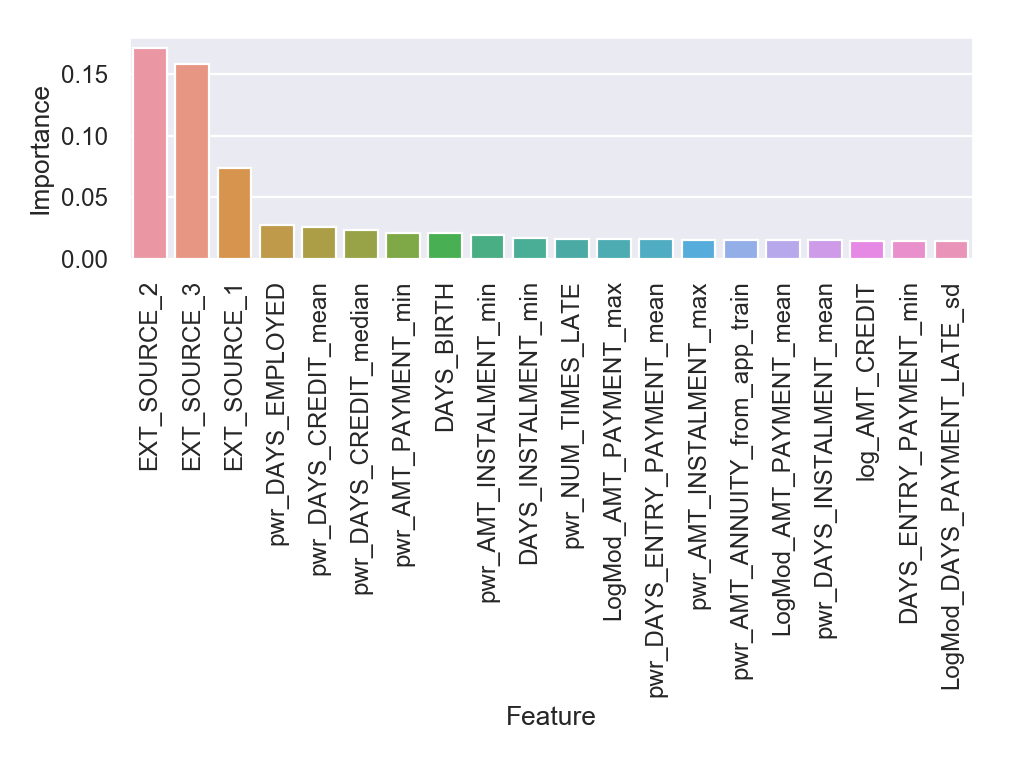

In [154]:
sns.barplot(x="Feature", y="Importance", data=final_feat_imports[:20])
plt.xticks(rotation=90)
plt.tight_layout()

### log reg, on EXT sources with poly interactions
Kaggle: Public: 0.70579 Private:0.71612

In [32]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = TRAIN_df[['EXT_SOURCE_1','EXT_SOURCE_2',
                                         'EXT_SOURCE_3']],
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=['EXT_SOURCE_1','EXT_SOURCE_2',
                                         'EXT_SOURCE_3']
                )

Total original feat len is 3. Sum of feats is 3.
Final array is length 35. final feature list is length 35.


In [33]:
TEST_piped = total_pipeline.transform(TEST_df)

In [34]:
LogReg_EXTpoly_level_1 = joblib.load(path_to_models + 'LogReg_EXTpoly_level_1.joblib')
LogReg_EXTpoly_level_1

LogisticRegression(C=30.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
preds = LogReg_EXTpoly_level_1.predict_proba(TEST_piped)
val_scores = [x[1] for x in preds]

In [36]:
raw_level_1_new_features_df['LogReg_EXTpoly'] = val_scores

In [37]:
this_model = 'LogReg_EXTpoly'

raw_level_1_new_features_df[[this_model]].to_csv(level_1_preds_save_path + this_model + '.csv', 
                                                 columns = list(raw_level_1_new_features_df[[this_model]].columns),
                                                 header = ['TARGET'],
                                                 )

###  log reg, on all features
Kaggle: Public: 0.75913 Private: 0.76233

In [38]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = TRAIN_df,
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=[]
                )

Total original feat len is 85. Sum of feats is 85.
Final array is length 418. final feature list is length 418.


In [39]:
TEST_piped = total_pipeline.transform(TEST_df)

In [40]:
LogReg_AllFeats_level_1 = joblib.load(path_to_models + 'LogReg_AllFeats_level_1.joblib')
LogReg_AllFeats_level_1

LogisticRegression(C=5.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
preds = LogReg_AllFeats_level_1.predict_proba(TEST_piped)
val_scores = [x[1] for x in preds]

In [42]:
raw_level_1_new_features_df['LogReg_AllFeats'] = val_scores

In [43]:
this_model = 'LogReg_AllFeats'

raw_level_1_new_features_df[[this_model]].to_csv(level_1_preds_save_path + this_model + '.csv', 
                                                 columns = list(raw_level_1_new_features_df[[this_model]].columns),
                                                 header = ['TARGET'],
                                                 )

### MLP Classifier, all features. 
Kaggle: Public: 0.75187 Private: 0.75392

In [44]:
total_df_piped, final_feature_list, total_pipeline, trans_list = \
master_pipeline(df_in = TRAIN_df,
                int_cutoff=20, 
                poly_deg=4, 
                feats_with_interaction=[]
                )

Total original feat len is 85. Sum of feats is 85.
Final array is length 418. final feature list is length 418.


In [45]:
TEST_piped = total_pipeline.transform(TEST_df)

In [46]:
MLP_AllFeats_level_1 = joblib.load(path_to_models + 'MLP_AllFeats_level_1.joblib')
MLP_AllFeats_level_1

MLPClassifier(activation='relu', alpha=0.35, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [47]:
preds = MLP_AllFeats_level_1.predict_proba(TEST_piped)
val_scores = [x[1] for x in preds]

In [48]:
raw_level_1_new_features_df['MLP_AllFeats'] = val_scores

In [49]:
this_model = 'MLP_AllFeats'

raw_level_1_new_features_df[[this_model]].to_csv(level_1_preds_save_path + this_model + '.csv', 
                                                 columns = list(raw_level_1_new_features_df[[this_model]].columns),
                                                 header = ['TARGET'],
                                                 )

# final new level 1 meta-features

In [50]:
def pwr_and_rescale(df_col, pwr):
    temp_col = df_col**pwr
    return (temp_col - min(temp_col)) /( max(temp_col) - min(temp_col))

In [51]:
FINAL_level_1_new_features_df = pd.DataFrame()

In [52]:
feat = 'RanFor_EXTpoly'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/5)
#total_df.drop(columns=[feat], inplace = True)

feat = 'RanFor_AllFeats'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/3.5)
#total_df.drop(columns=[feat], inplace = True)

feat = 'LogReg_EXTpoly'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/7)
#total_df.drop(columns=[feat], inplace = True)

feat = 'LogReg_AllFeats'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/4)
#total_df.drop(columns=[feat], inplace = True)

feat = 'MLP_AllFeats'
FINAL_level_1_new_features_df['pwr_rescale_'+ feat] = pwr_and_rescale(+raw_level_1_new_features_df[feat], 1/4)
#total_df.drop(columns=[feat], inplace = True)


In [53]:
pwd

'/Users/DonBunk/Desktop/Google Drive/data_science/Python_Projects/Home_Credit_Default_Risk'

In [54]:
FINAL_level_1_new_features_df.to_csv(level_1_metafeats_save_path + 'FINAL_level_1_meta_features_df.csv', 
                                     columns = list(FINAL_level_1_new_features_df.columns))